In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension for Conv2D
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.9106 - loss: 0.3019 - val_accuracy: 0.9790 - val_loss: 0.0633
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 22ms/step - accuracy: 0.9844 - loss: 0.0520 - val_accuracy: 0.9836 - val_loss: 0.0494
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9849 - val_loss: 0.0490
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9932 - loss: 0.0203 - val_accuracy: 0.9857 - val_loss: 0.0437
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9955 - loss: 0.0142 - val_accuracy: 0.9864 - val_loss: 0.0428


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9837 - loss: 0.0505
Test Accuracy: 0.9864000082015991


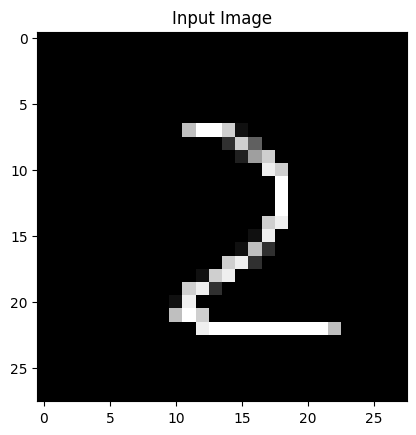

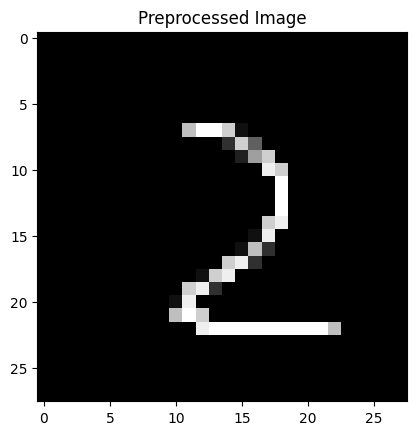

In [15]:
import cv2
import numpy as np

# Load your image
image_path = "/content/test2.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
plt.imshow(image, cmap='gray')
plt.title("Input Image")
plt.show()


In [ ]:
#preprocessing
# Resize to 28x28 pixels
#image_resized = cv2.resize(image, (28, 28))
#plt.imshow(image_resized, cmap='gray')
#plt.title("Preprocessed Image")
#plt.show()

In [18]:
# Normalize pixel values to [0, 1]
#for single pictures
image_normalized = image / 255.0
# Add batch and channel dimensions
image_preprocessed = np.expand_dims(image_normalized, axis=(0, -1))  # Shape: (1, 28, 28, 1)

# Predict with the model
predictions = model.predict(image_preprocessed)
predicted_digit = np.argmax(predictions, axis=1)[0]
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Digit: 2


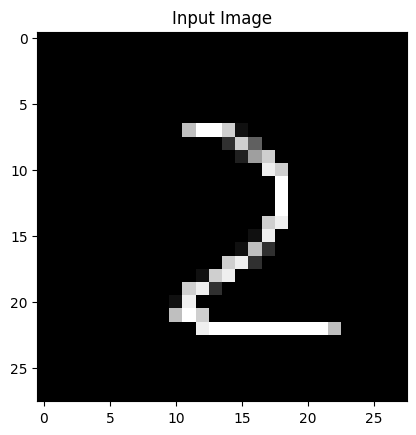

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Digit for /content/test2.png: 2


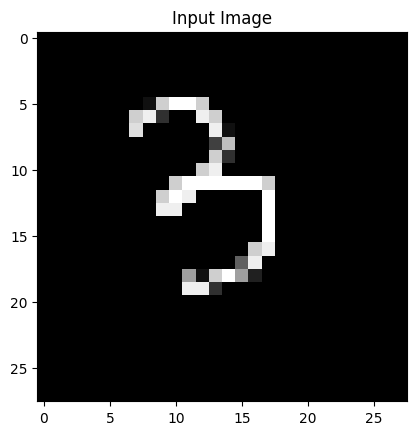

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Digit for /content/test3.png: 3


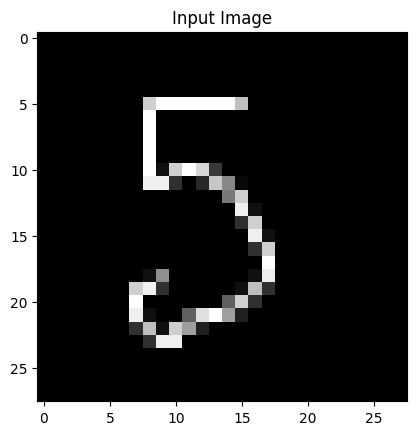

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Digit for /content/test5.png: 5


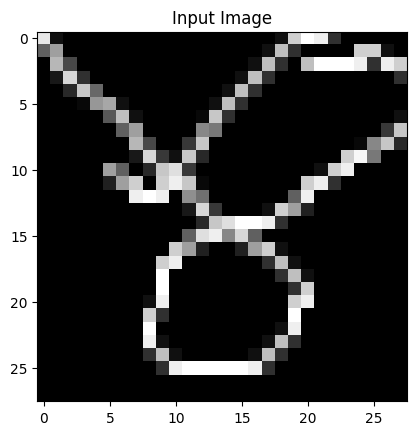

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit for /content/test8.png: 8


In [20]:
# for multiple pictures
import cv2
import numpy as np


image_paths = ["/content/test2.png", "/content/test3.png", "/content/test5.png","/content/test8.png"]

# Loop through each image
for image_path in image_paths:
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    # Display the image using matplotlib
    plt.imshow(image, cmap='gray')
    plt.title(f"Input Image")
    plt.show()
    image_normalized = image / 255.0  # Normalize pixel values to [0, 1]
    image_preprocessed = np.expand_dims(image_normalized, axis=(0, -1))  # Shape: (1, 28, 28, 1)

    # Predict with the model
    predictions = model.predict(image_preprocessed)
    predicted_digit = np.argmax(predictions, axis=1)[0]
    # Print the predicted digit
    print(f"Predicted Digit for {image_path}: {predicted_digit}")
